# Exploratory Data Analysis (EDA) for Credit Scoring Model

This notebook explores the Xente Challenge dataset to gain a deep understanding of its structure, identify data quality issues, and uncover patterns to guide feature engineering for the Credit Scoring Model. The dataset contains transaction data from an eCommerce platform, which will be used to develop a credit scoring model for Bati Bank's buy-now-pay-later service.

## Objectives
- Understand dataset structure (rows, columns, data types, unique values).
- Compute summary statistics (central tendency, dispersion).
- Visualize distributions of numerical and categorical features.
- Analyze relationships between categorical features and the target (`FraudResult`).
- Examine temporal patterns in `TransactionStartTime`.
- Investigate correlations between numerical features.
- Identify null values using multiple methods (standard and non-standard nulls).
- Detect outliers and their potential impact.
- Summarize key insights to inform feature engineering.

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## 1. Load the Dataset

Load the dataset from `../data/raw/data.csv` and display its structure, including shape, data types, and unique value counts to understand the dataset's composition.


In [12]:
# Load data
data = pd.read_csv('../data/raw/data.csv')
print('Dataset Shape:', data.shape)
print('\nData Types:\n', data.dtypes)
print('\nUnique Values per Column:\n', data.nunique())
data.head()

Dataset Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Unique Values per Column:
 TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStar

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


**Explanation**: The dataset contains transaction records with identifiers (`TransactionId`, `BatchId`, `AccountId`, `SubscriptionId`, `CustomerId`), categorical features (`CurrencyCode`, `CountryCode`, `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`), numerical features (`Amount`, `Value`), a timestamp (`TransactionStartTime`), and a target variable (`FraudResult`). The unique value counts help identify features with low variability (e.g., `CurrencyCode`, `CountryCode`) that may have limited predictive power.

## 2. Summary Statistics

Compute summary statistics for numerical features (`Amount`, `Value`, `FraudResult`) to understand their central tendency, dispersion, and shape.


In [14]:
# Summary statistics for numerical features
data[['Amount', 'Value', 'FraudResult']].describe()

,Amount,Value,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000
mean,6.717846e+03,9.900584e+03,0.002018
std,1.233068e+05,1.231221e+05,0.044872
min,-1.000000e+06,2.000000e+00,0.000000
25%,-5.000000e+01,2.750000e+02,0.000000
50%,1.000000e+03,1.000000e+03,0.000000
75%,2.800000e+03,5.000000e+03,0.000000
max,9.880000e+06,9.880000e+06,1.000000


**Explanation**: The summary statistics reveal the range, mean, and standard deviation of `Amount` and `Value`. `Amount` includes both positive (debits) and negative (credits) values, while `Value` is the absolute amount. `FraudResult` is binary (0 or 1), indicating whether a transaction is fraudulent. The large standard deviation in `Amount` and `Value` suggests potential skewness or outliers, which will be explored further.


## 3. Distribution of Numerical Features

Visualize the distribution of `Amount` and `Value` to identify patterns, skewness, and potential outliers. Use log-transformed distributions to handle skewness.


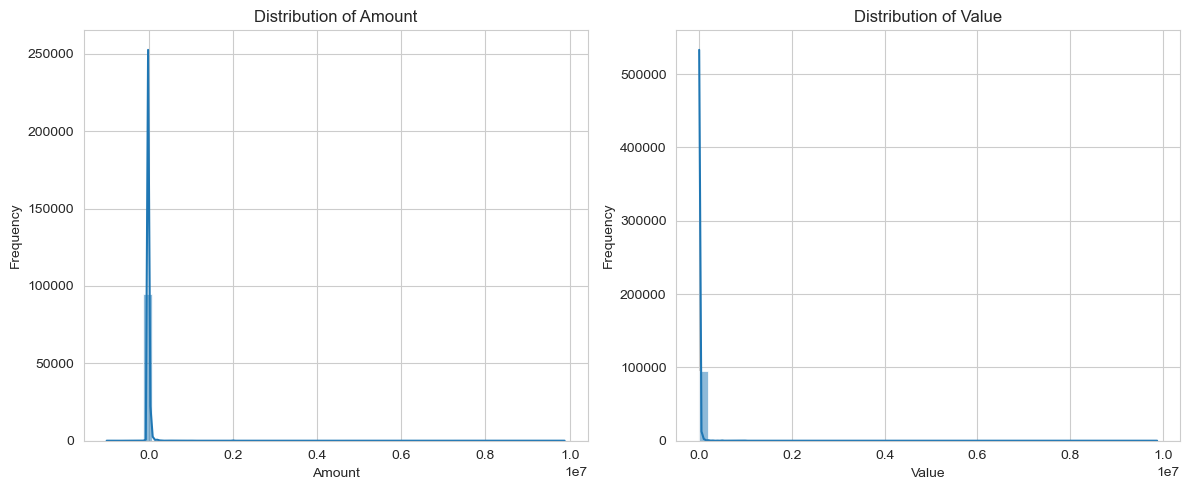

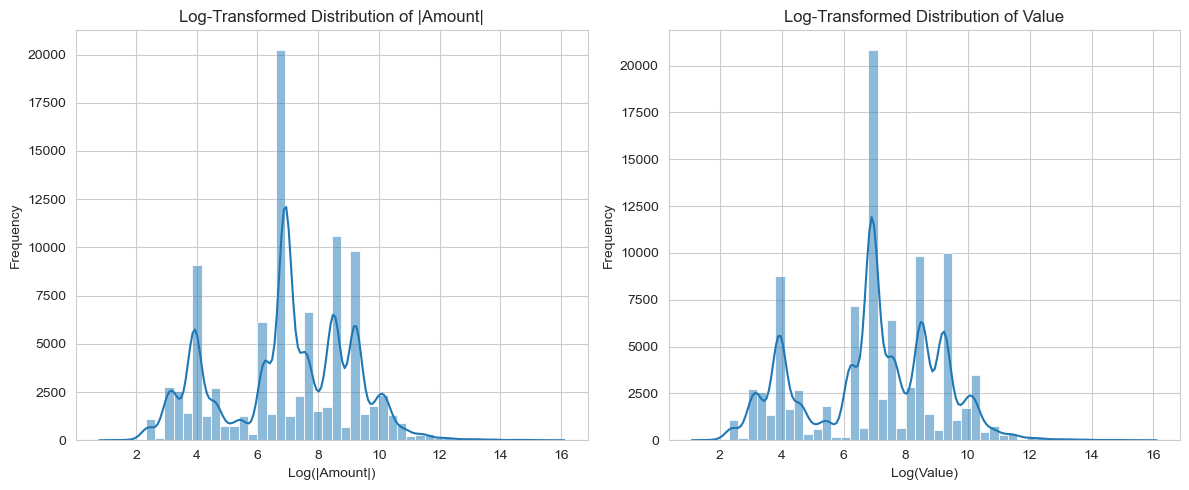

In [15]:
# Plot histograms for Amount and Value
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Value'], bins=50, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Log-transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(np.log1p(data['Amount'].abs()), bins=50, kde=True)
plt.title('Log-Transformed Distribution of |Amount|')
plt.xlabel('Log(|Amount|)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['Value']), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Value')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Explanation**: The histograms for `Amount` and `Value` are likely skewed due to large transaction values. Log-transformation (`np.log1p`) helps normalize the distributions, making patterns more visible. This suggests that log-transformed features may be useful for modeling to reduce the impact of extreme values.


## 4. Distribution of Categorical Features

Analyze the distribution of key categorical features (`ProductCategory`, `ChannelId`, `PricingStrategy`, `ProviderId`, `ProductId`) and their relationship with `FraudResult` to assess their predictive power.


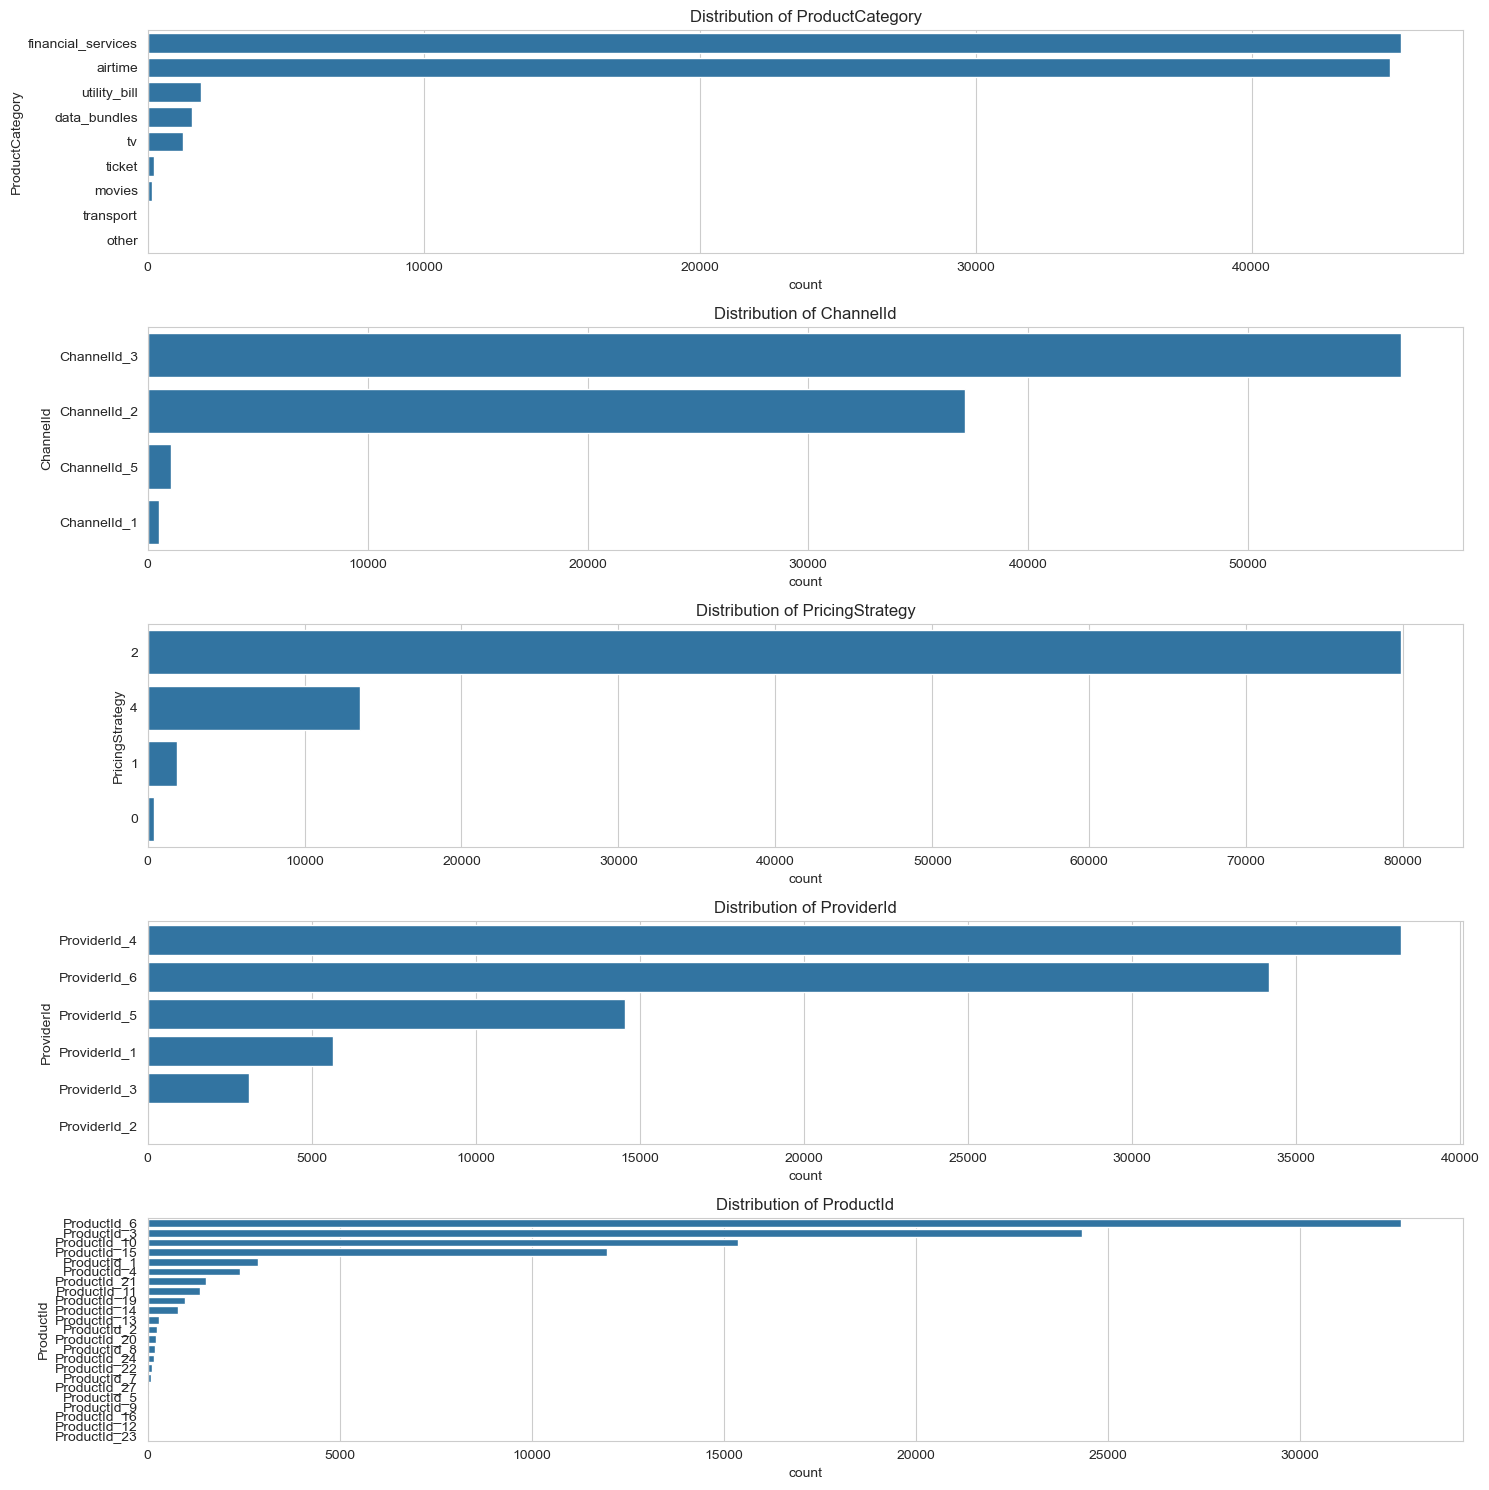

In [16]:
# Plot bar charts for categorical features
plt.figure(figsize=(15, 15))

plt.subplot(5, 1, 1)
sns.countplot(y='ProductCategory', data=data, order=data['ProductCategory'].value_counts().index)
plt.title('Distribution of ProductCategory')

plt.subplot(5, 1, 2)
sns.countplot(y='ChannelId', data=data, order=data['ChannelId'].value_counts().index)
plt.title('Distribution of ChannelId')

plt.subplot(5, 1, 3)
sns.countplot(y='PricingStrategy', data=data, order=data['PricingStrategy'].value_counts().index)
plt.title('Distribution of PricingStrategy')

plt.subplot(5, 1, 4)
sns.countplot(y='ProviderId', data=data, order=data['ProviderId'].value_counts().index)
plt.title('Distribution of ProviderId')

plt.subplot(5, 1, 5)
sns.countplot(y='ProductId', data=data, order=data['ProductId'].value_counts().index)
plt.title('Distribution of ProductId')

plt.tight_layout()
plt.show()

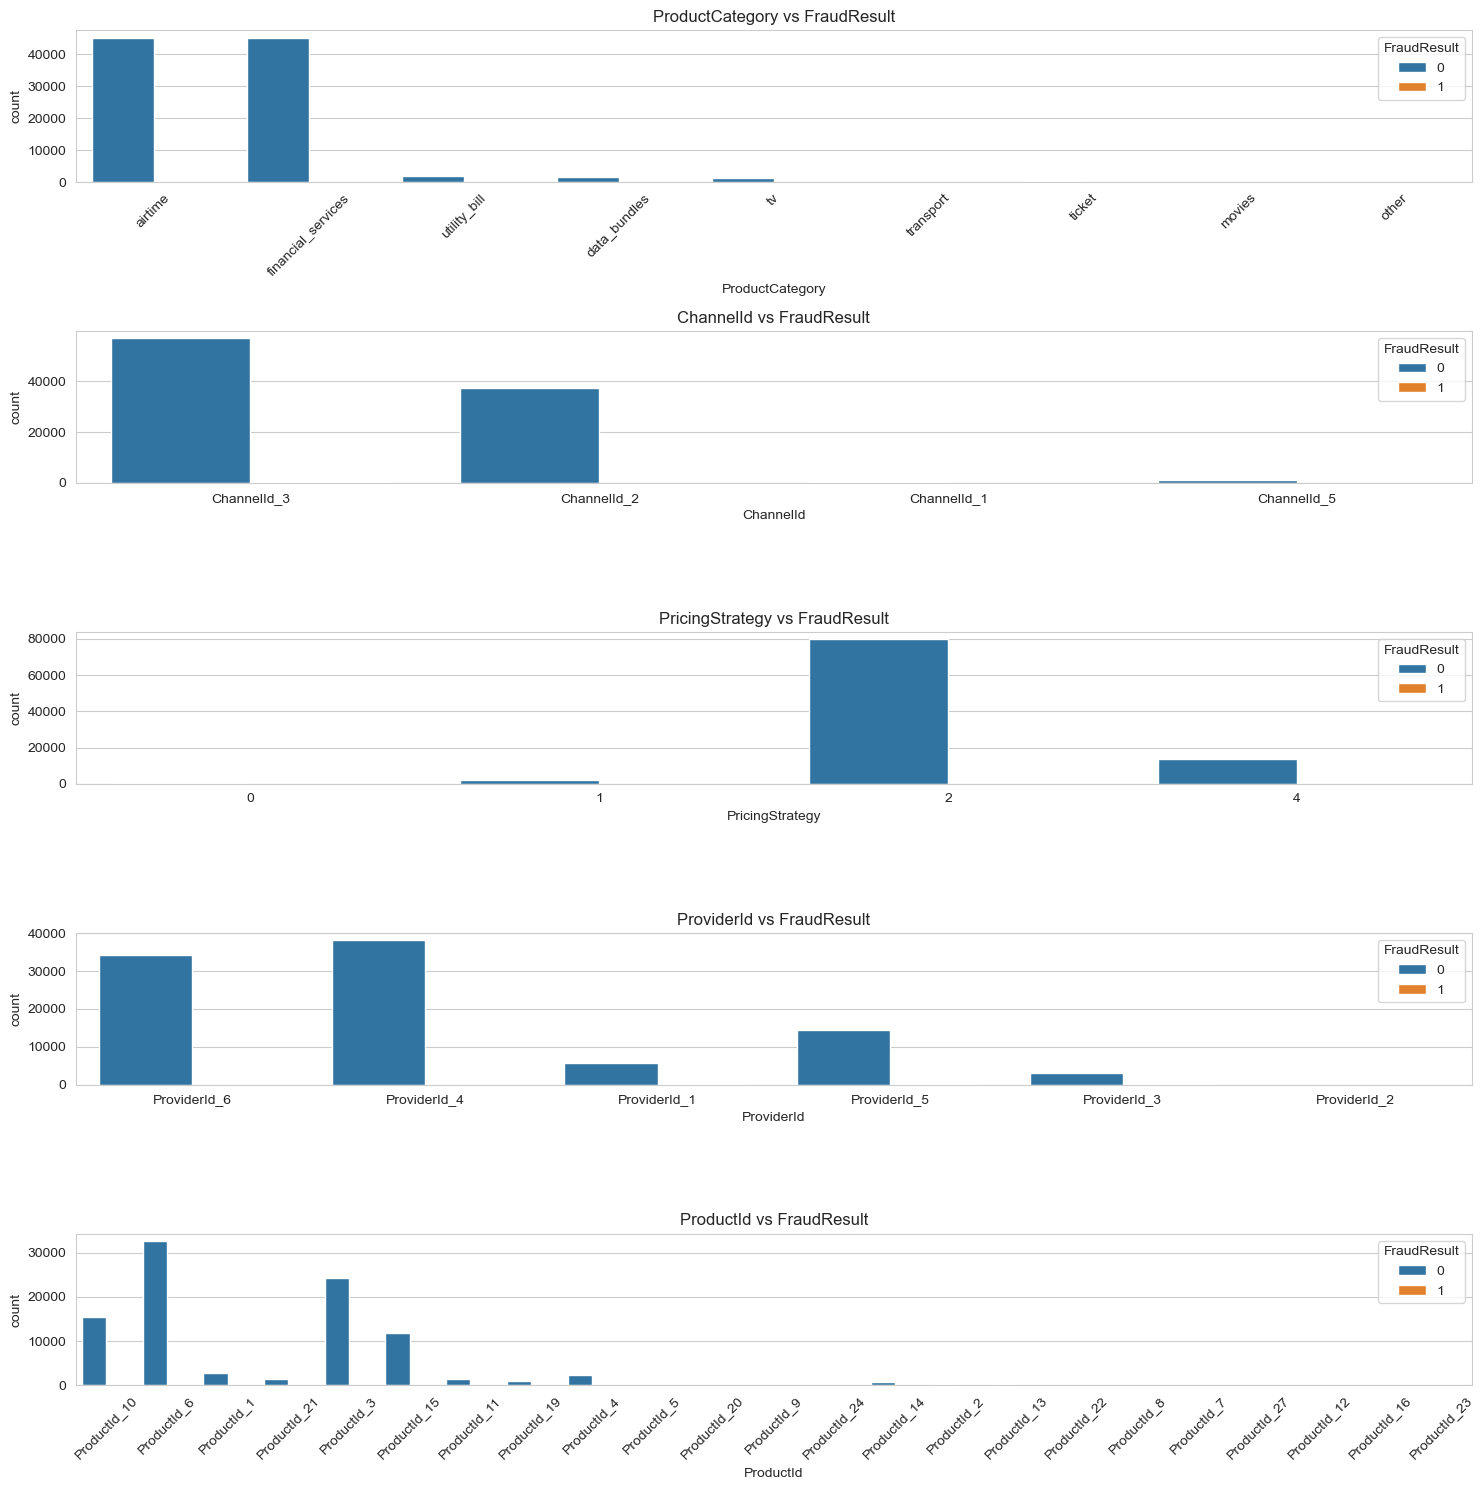

In [17]:
# Relationship with FraudResult
plt.figure(figsize=(15, 15))

plt.subplot(5, 1, 1)
sns.countplot(x='ProductCategory', hue='FraudResult', data=data)
plt.title('ProductCategory vs FraudResult')
plt.xticks(rotation=45)

plt.subplot(5, 1, 2)
sns.countplot(x='ChannelId', hue='FraudResult', data=data)
plt.title('ChannelId vs FraudResult')

plt.subplot(5, 1, 3)
sns.countplot(x='PricingStrategy', hue='FraudResult', data=data)
plt.title('PricingStrategy vs FraudResult')

plt.subplot(5, 1, 4)
sns.countplot(x='ProviderId', hue='FraudResult', data=data)
plt.title('ProviderId vs FraudResult')

plt.subplot(5, 1, 5)
sns.countplot(x='ProductId', hue='FraudResult', data=data)
plt.title('ProductId vs FraudResult')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Explanation**: The distribution of categorical features shows the frequency of each category, highlighting imbalances (e.g., dominance of certain `ProductCategory` values like 'airtime'). The relationship with `FraudResult` reveals whether specific categories are associated with fraudulent transactions, which can guide feature selection. For instance, if certain `ProductId` values have a higher proportion of `FraudResult=1`, they may be strong predictors of risk.


## 5. Temporal Analysis

Extract temporal features from `TransactionStartTime` (hour, day, month, year) and analyze their distribution and relationship with `FraudResult`.


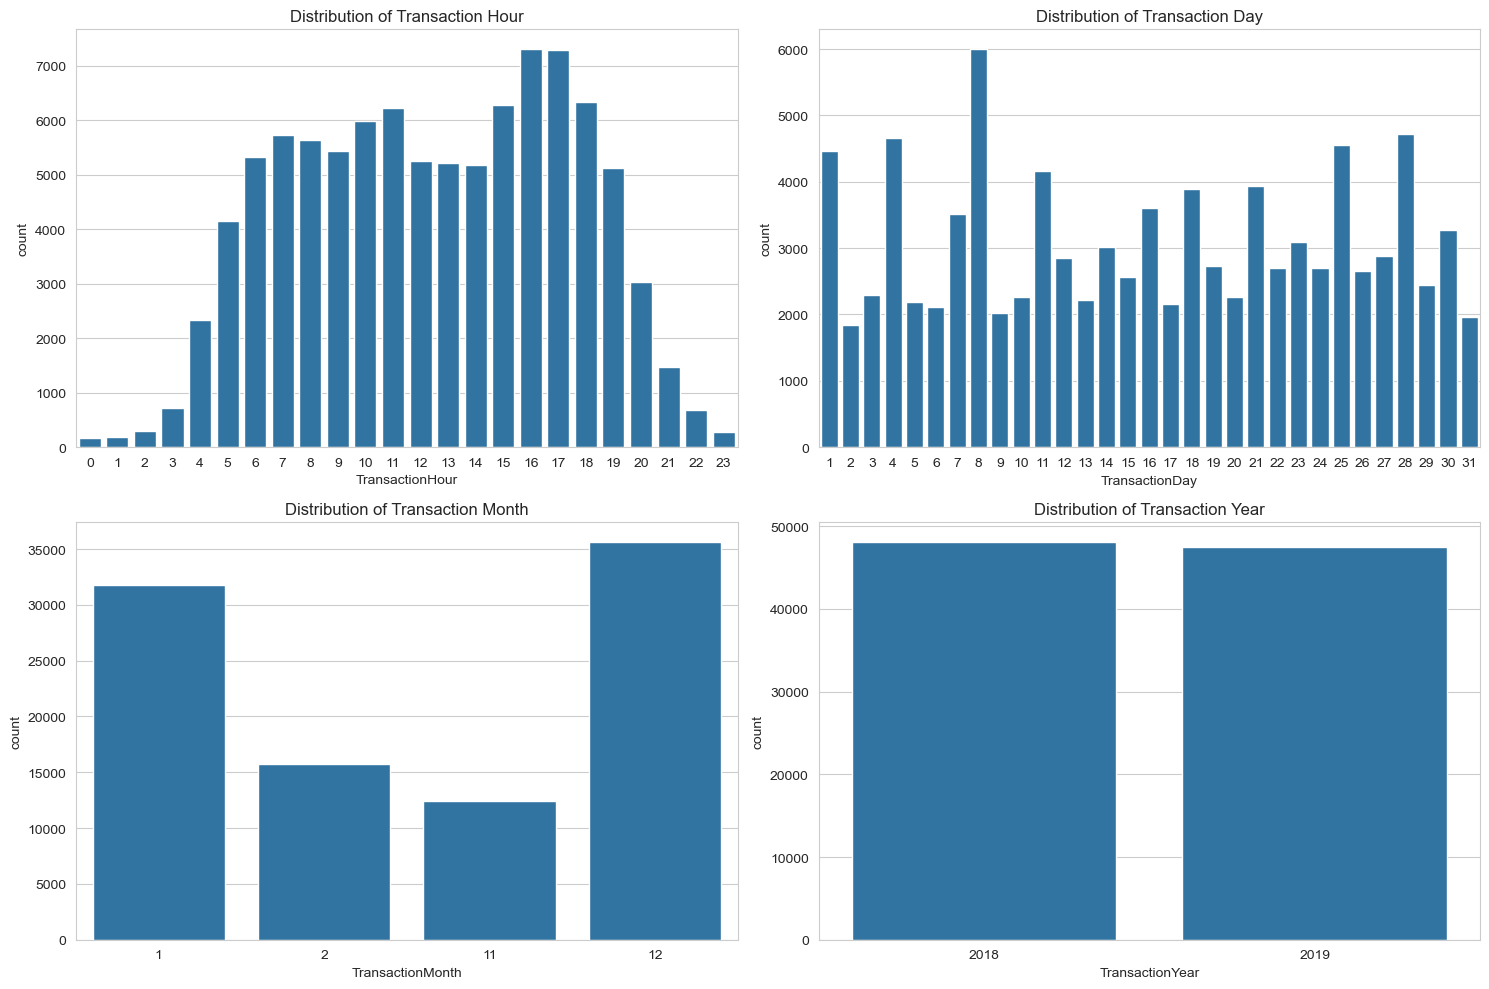

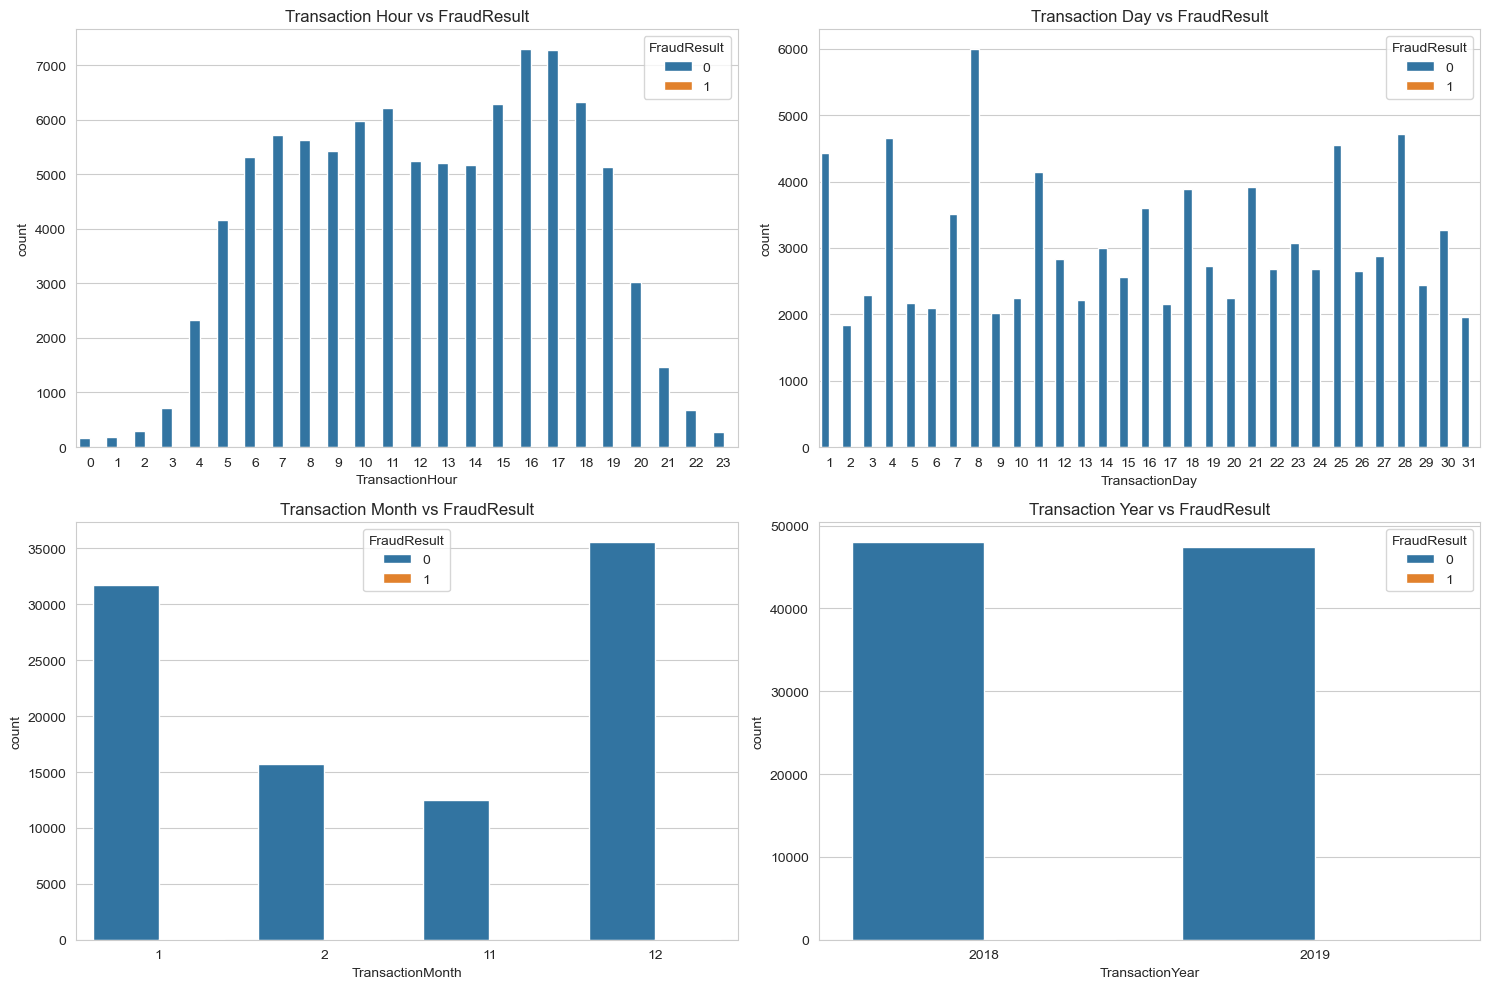

In [18]:
# Extract temporal features
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year

# Plot temporal distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='TransactionHour', data=data)
plt.title('Distribution of Transaction Hour')

plt.subplot(2, 2, 2)
sns.countplot(x='TransactionDay', data=data)
plt.title('Distribution of Transaction Day')

plt.subplot(2, 2, 3)
sns.countplot(x='TransactionMonth', data=data)
plt.title('Distribution of Transaction Month')

plt.subplot(2, 2, 4)
sns.countplot(x='TransactionYear', data=data)
plt.title('Distribution of Transaction Year')

plt.tight_layout()
plt.show()

# Temporal features vs FraudResult
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='TransactionHour', hue='FraudResult', data=data)
plt.title('Transaction Hour vs FraudResult')

plt.subplot(2, 2, 2)
sns.countplot(x='TransactionDay', hue='FraudResult', data=data)
plt.title('Transaction Day vs FraudResult')

plt.subplot(2, 2, 3)
sns.countplot(x='TransactionMonth', hue='FraudResult', data=data)
plt.title('Transaction Month vs FraudResult')

plt.subplot(2, 2, 4)
sns.countplot(x='TransactionYear', hue='FraudResult', data=data)
plt.title('Transaction Year vs FraudResult')

plt.tight_layout()
plt.show()

**Explanation**: Temporal features like transaction hour or day may reveal patterns (e.g., fraud occurring at specific times). The distributions show transaction frequency over time, and the relationship with `FraudResult` indicates whether certain time periods are associated with higher fraud risk, informing feature engineering.


## 6. Correlation Analysis

Examine correlations between numerical features (`Amount`, `Value`, `FraudResult`) to identify relationships and potential multicollinearity.


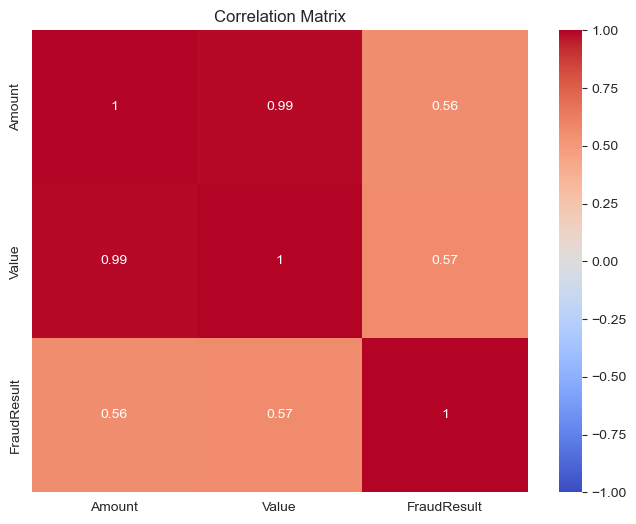

In [19]:
# Correlation matrix
corr = data[['Amount', 'Value', 'FraudResult']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Explanation**: The correlation matrix shows the strength of relationships between numerical features. A high correlation between `Amount` and `Value` suggests redundancy, while the correlation with `FraudResult` indicates its predictive power as a proxy for default risk.


## 7. Identifying Null Values

Check for null values using multiple methods:
- Standard nulls with `.isnull().sum()`.
- Non-standard nulls (e.g., empty strings, 'NaN' as strings, or invalid values like negative `Value`).
- Check for unexpected data types or values in categorical columns.

In [21]:
# Standard null check
print('Standard Null Values:\n', data.isnull().sum())

Standard Null Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
TransactionYear         0
dtype: int64


In [22]:
# Check for non-standard nulls (empty strings, 'NaN', etc.)
print('\nNon-Standard Null Checks:')
for col in data.select_dtypes(include='object').columns:
    print(f"{col} - Empty strings: {len(data[data[col].str.strip() == ''])}")
    print(f"{col} - 'NaN' strings: {len(data[data[col].str.lower() == 'nan'])}")


Non-Standard Null Checks:
TransactionId - Empty strings: 0
TransactionId - 'NaN' strings: 0
BatchId - Empty strings: 0
BatchId - 'NaN' strings: 0
AccountId - Empty strings: 0
AccountId - 'NaN' strings: 0
SubscriptionId - Empty strings: 0
SubscriptionId - 'NaN' strings: 0
CustomerId - Empty strings: 0
CustomerId - 'NaN' strings: 0
CurrencyCode - Empty strings: 0
CurrencyCode - 'NaN' strings: 0
ProviderId - Empty strings: 0
ProviderId - 'NaN' strings: 0
ProductId - Empty strings: 0
ProductId - 'NaN' strings: 0
ProductCategory - Empty strings: 0
ProductCategory - 'NaN' strings: 0
ChannelId - Empty strings: 0
ChannelId - 'NaN' strings: 0


In [23]:
# Check for invalid numerical values (e.g., negative Value)
print('\nInvalid Numerical Values:')
print(f"Negative Value counts: {len(data[data['Value'] < 0])}")
print(f"Zero Value counts: {len(data[data['Value'] == 0])}")


Invalid Numerical Values:
Negative Value counts: 0
Zero Value counts: 0


In [24]:
# Check for unexpected categorical values
print('\nUnique Values in Categorical Columns:')
for col in ['ProductCategory', 'ChannelId', 'PricingStrategy', 'ProviderId', 'ProductId', 'CurrencyCode', 'CountryCode']:
    print(f"{col}: {data[col].unique()}")


Unique Values in Categorical Columns:
ProductCategory: ['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
ChannelId: ['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
PricingStrategy: [2 4 1 0]
ProviderId: ['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']
ProductId: ['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']
CurrencyCode: ['UGX']
CountryCode: [256]


**Explanation**: Beyond `.isnull().sum()`, I check for empty strings or 'NaN' in categorical columns, which could indicate missing data. For numerical columns, negative or zero `Value` may be invalid since `Value` is defined as the absolute transaction amount. Unique values in categorical columns help identify unexpected or erroneous entries (e.g., typos or inconsistent formats).


## 8. Outlier Detection

Use box plots and IQR method to identify outliers in `Amount` and `Value`.


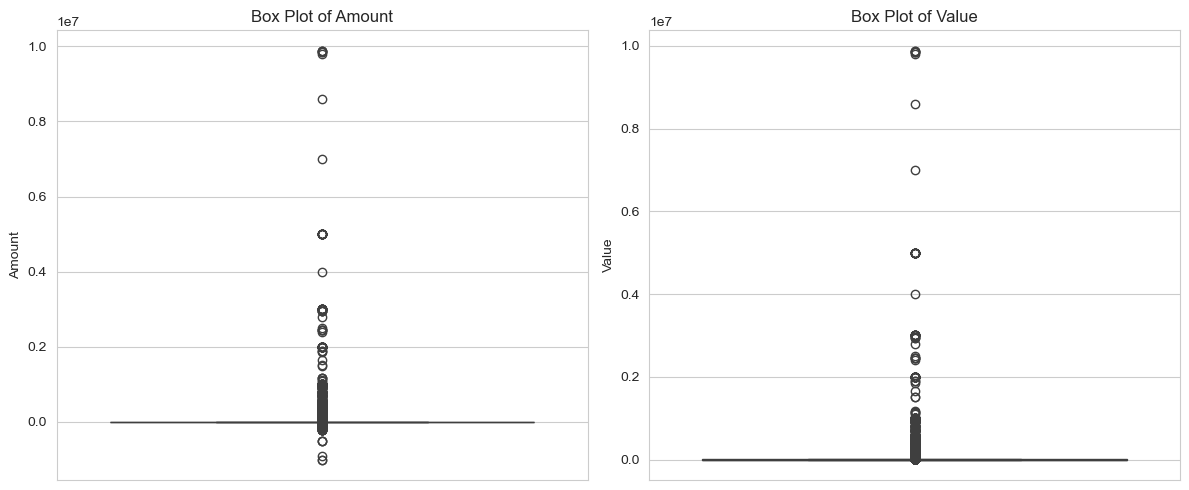

Amount Outliers: 24441 (Lower: -4325.0, Upper: 7075.0)
Value Outliers: 9021 (Lower: -6812.5, Upper: 12087.5)


In [25]:
# Box plots for Amount and Value
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Amount'])
plt.title('Box Plot of Amount')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Value'])
plt.title('Box Plot of Value')

plt.tight_layout()
plt.show()

# IQR method for outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

amount_outliers, amount_lower, amount_upper = detect_outliers_iqr(data, 'Amount')
value_outliers, value_lower, value_upper = detect_outliers_iqr(data, 'Value')

print(f'Amount Outliers: {amount_outliers} (Lower: {amount_lower}, Upper: {amount_upper})')
print(f'Value Outliers: {value_outliers} (Lower: {value_lower}, Upper: {value_upper})')

**Explanation**: Box plots visually identify outliers in `Amount` and `Value`. The IQR method quantifies outliers by defining bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR). Outliers may represent high-value transactions or errors, which could impact model performance if not handled (e.g., via capping or transformation).


## 9. Key Insights

Based on the EDA, here are the top 5 insights:
1. **Skewed Numerical Features**: `Amount` and `Value` are highly skewed, with most transactions being small but a few large outliers. Log-transformation reduces skewness, suggesting its use in feature engineering.
2. **Categorical Imbalance**: `ProductCategory`, `ChannelId`, and `ProductId` show significant imbalances (e.g., dominance of 'airtime' or specific channels), which may require stratified sampling or careful encoding to avoid bias.
3. **FraudResult as Proxy**: The low correlation between `Amount`/`Value` and `FraudResult`, combined with categorical feature analysis, suggests `FraudResult` may be a weak proxy for default risk. Certain categories (e.g., specific `ProductId`) may have higher fraud rates, indicating potential predictive power.
4. **Temporal Patterns**: Transaction patterns vary by hour, day, and month, with potential peaks in fraud at specific times (e.g., late hours). Temporal features should be included in the model.
5. **Data Quality**: No standard nulls were found, but non-standard nulls (e.g., empty strings) and invalid values (e.g., negative `Value`) need checking. Categorical features have consistent values, but low variability in `CurrencyCode` and `CountryCode` suggests limited predictive utility.
